In [1]:
import pandas as pd
import numpy as np

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('winequality-white_labels_missing.csv', sep=";")

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,NaN
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,NaN
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,NaN
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,NaN


In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [6]:
data[data["quality"].notna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3522,6.6,0.32,0.41,7.2,0.048,55.0,178.0,0.99537,3.20,0.46,9.4,5.0
3523,6.0,0.23,0.15,9.7,0.048,101.0,207.0,0.99571,3.05,0.30,9.1,5.0
3524,5.3,0.36,0.27,6.3,0.028,40.0,132.0,0.99186,3.37,0.40,11.6,6.0
3525,5.3,0.36,0.27,6.3,0.028,40.0,132.0,0.99186,3.37,0.40,11.6,6.0


In [7]:
np.unique(data[data["quality"].notna()]["quality"])

array([3., 4., 5., 6., 7., 8., 9.])

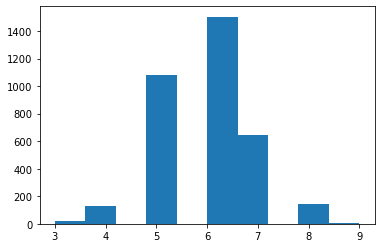

In [8]:
plt.hist(x=data[data["quality"].notna()]["quality"])
plt.show()

In [9]:
data[data["quality"].notna()]["quality"].value_counts()

6.0    1504
5.0    1083
7.0     647
8.0     144
4.0     126
3.0      18
9.0       5
Name: quality, dtype: int64

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,3527.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.875532
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.916595
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
data.isnull().sum()

fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                 1371
dtype: int64

In [12]:
data_wona = data[data["quality"].notna()]

In [13]:
data_wona.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000,3527.000000
mean,6.993521,0.275377,0.345852,6.321066,0.045819,35.502694,141.929118,0.994290,3.198262,0.489481,10.415991,5.875532
std,0.853177,0.100435,0.123763,5.094749,0.022020,16.814756,43.674023,0.002974,0.153721,0.114230,1.192470,0.916595
min,4.200000,0.080000,0.000000,0.600000,0.012000,3.000000,18.000000,0.987130,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.210000,0.280000,1.700000,0.036000,23.000000,110.000000,0.992000,3.090000,0.410000,9.400000,5.000000
50%,6.900000,0.260000,0.330000,5.100000,0.043000,34.000000,139.000000,0.994000,3.190000,0.470000,10.200000,6.000000
75%,7.500000,0.320000,0.400000,9.800000,0.050000,46.000000,171.000000,0.996350,3.300000,0.550000,11.300000,6.000000
max,14.200000,1.005000,1.660000,65.800000,0.346000,146.500000,366.500000,1.038980,3.820000,1.060000,14.000000,9.000000


In [14]:
data_wona.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
data_wona.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
X = data_wona.loc[:, data_wona.columns != "quality"]

In [18]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
3522,6.6,0.32,0.41,7.2,0.048,55.0,178.0,0.99537,3.20,0.46,9.4
3523,6.0,0.23,0.15,9.7,0.048,101.0,207.0,0.99571,3.05,0.30,9.1
3524,5.3,0.36,0.27,6.3,0.028,40.0,132.0,0.99186,3.37,0.40,11.6
3525,5.3,0.36,0.27,6.3,0.028,40.0,132.0,0.99186,3.37,0.40,11.6


In [35]:
Y= data_wona.loc[:, data_wona.columns== "quality"]

In [36]:
Y

,quality
0,6.0
1,6.0
2,6.0
3,6.0
4,6.0
...,...
3522,5.0
3523,5.0
3524,6.0
3525,6.0


In [49]:
Xtrain, Xtest, Ytrain, Ytest =  train_test_split(np.array(X), np.array(Y), test_size=0.3, random_state=42)

In [71]:
Ytest = Ytest.reshape(1,1059)

In [74]:
Ytest[0].tolist()

[5.0,
 6.0,
 7.0,
 6.0,
 6.0,
 6.0,
 7.0,
 5.0,
 6.0,
 6.0,
 5.0,
 4.0,
 7.0,
 7.0,
 5.0,
 8.0,
 6.0,
 6.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 7.0,
 6.0,
 5.0,
 6.0,
 6.0,
 6.0,
 7.0,
 5.0,
 5.0,
 7.0,
 6.0,
 7.0,
 6.0,
 6.0,
 5.0,
 7.0,
 6.0,
 7.0,
 5.0,
 5.0,
 7.0,
 5.0,
 7.0,
 6.0,
 5.0,
 6.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 5.0,
 7.0,
 5.0,
 7.0,
 7.0,
 7.0,
 5.0,
 5.0,
 5.0,
 6.0,
 7.0,
 6.0,
 5.0,
 7.0,
 7.0,
 6.0,
 7.0,
 6.0,
 5.0,
 7.0,
 5.0,
 5.0,
 5.0,
 6.0,
 7.0,
 5.0,
 7.0,
 6.0,
 5.0,
 7.0,
 5.0,
 6.0,
 6.0,
 6.0,
 5.0,
 5.0,
 6.0,
 5.0,
 6.0,
 5.0,
 6.0,
 6.0,
 8.0,
 5.0,
 7.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 6.0,
 6.0,
 6.0,
 5.0,
 8.0,
 6.0,
 5.0,
 7.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 5.0,
 5.0,
 6.0,
 7.0,
 5.0,
 5.0,
 6.0,
 6.0,
 5.0,
 7.0,
 5.0,
 6.0,
 7.0,
 6.0,
 7.0,
 7.0,
 7.0,
 8.0,
 5.0,
 5.0,
 5.0,
 6.0,
 7.0,
 6.0,
 5.0,
 8.0,
 6.0,
 7.0,
 6.0,
 5.0,
 7.0,
 6.0,
 6.0,
 6.0

In [50]:
model = LinearRegression().fit(np.array(Xtrain),np.array(Ytrain))

In [55]:
Ypred= model.predict(Xtest)

In [61]:
Ypred = [round(e) for e in Ypred[:,0]]
    

accuracy_score(Ytest[0].tolist(), Ypred)

In [76]:
confusion_matrix(Ytest[0].tolist(), Ypred)

array([[  0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   3,   0,   0],
       [  0,   0,   4,  17,  10,   0,   0],
       [  0,   0,   0, 141, 180,   4,   0],
       [  1,   0,   0,  84, 328,  45,   0],
       [  0,   0,   0,   6, 121,  67,   0],
       [  0,   0,   0,   0,  22,  24,   0]], dtype=int64)

### Applying Standardiazation 

In [83]:
scaler = StandardScaler()
scaler.fit(Xtrain)

StandardScaler()

In [84]:
Xtrain = scaler.transform(Xtrain)

In [85]:
Xtrain

array([[-0.5957996 , -0.94837609, -0.12699947, ...,  0.52846587,
        -0.43084954, -1.44343205],
       [-0.23831984, -0.13968933, -0.84993959, ..., -0.44860083,
        -0.16792941, -1.27510497],
       [ 1.19159919,  2.99397186,  0.3549606 , ...,  0.59360365,
         1.58487149,  2.00727323],
       ...,
       [ 1.31075911, -0.03860349,  0.03365388, ...,  0.13763919,
         1.23431131, -0.01265181],
       [ 0.11915992,  0.87116912, -0.52863287, ..., -0.05777415,
        -0.43084954,  2.59641804],
       [-0.11915992,  0.87116912,  0.03365388, ..., -1.29539197,
        -1.48253008,  1.67061906]])

In [86]:
Xtest = scaler.transform(Xtest)

In [91]:
Xtest

array([[ 0.5957996 , -0.03860349, -0.28765283, ..., -0.12291193,
         0.88375113,  0.07151173],
       [ 0.35747976,  2.38745679, -0.44830619, ..., -0.38346305,
         0.620831  , -0.77012371],
       [-1.66823887, -0.94837609,  1.88116751, ...,  2.02663481,
         0.97139118,  1.33396488],
       ...,
       [-1.07243927,  0.06248236, -0.60895955, ..., -0.25318749,
        -0.60612963,  1.7547826 ],
       [-0.47663968, -0.34186102, -0.52863287, ...,  0.91929255,
        -0.25556945,  0.82898362],
       [-0.47663968, -1.15054778, -1.09091963, ..., -0.31832527,
         0.27027082,  0.32400236]])

In [87]:
model = LinearRegression().fit(np.array(Xtrain),np.array(Ytrain))

In [88]:
Ypred= model.predict(Xtest)

In [89]:
Ypred = [round(e) for e in Ypred[:,0]]
    

In [90]:
accuracy_score(Ytest[0].tolist(), Ypred)

0.509915014164306

In [93]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.013480,0.280610,0.092103,0.005979,-0.070426,0.053298,0.237385,-0.444774,-0.022218,-0.060460
volatile acidity,0.013480,1.000000,-0.117842,0.112638,0.086642,-0.090426,0.116781,0.089931,-0.085555,-0.045917,0.010430
citric acid,0.280610,-0.117842,1.000000,0.131181,0.093300,0.087589,0.090646,0.152500,-0.196066,0.039072,-0.053536
residual sugar,0.092103,0.112638,0.131181,1.000000,0.092622,0.325213,0.426826,0.842387,-0.171396,-0.028865,-0.436078
chlorides,0.005979,0.086642,0.093300,0.092622,1.000000,0.103462,0.209855,0.259865,-0.071537,0.026804,-0.354431
free sulfur dioxide,-0.070426,-0.090426,0.087589,0.325213,0.103462,1.000000,0.627812,0.305304,-0.001596,0.048526,-0.259144
total sulfur dioxide,0.053298,0.116781,0.090646,0.426826,0.209855,0.627812,1.000000,0.538432,-0.014077,0.150026,-0.454115
density,0.237385,0.089931,0.152500,0.842387,0.259865,0.305304,0.538432,1.000000,-0.060730,0.090990,-0.757308
pH,-0.444774,-0.085555,-0.196066,-0.171396,-0.071537,-0.001596,-0.014077,-0.060730,1.000000,0.188007,0.081345
sulphates,-0.022218,-0.045917,0.039072,-0.028865,0.026804,0.048526,0.150026,0.090990,0.188007,1.000000,-0.036146


In [96]:
data_wona.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.013480,0.280610,0.092103,0.005979,-0.070426,0.053298,0.237385,-0.444774,-0.022218,-0.060460,-0.120075
volatile acidity,0.013480,1.000000,-0.117842,0.112638,0.086642,-0.090426,0.116781,0.089931,-0.085555,-0.045917,0.010430,-0.194701
citric acid,0.280610,-0.117842,1.000000,0.131181,0.093300,0.087589,0.090646,0.152500,-0.196066,0.039072,-0.053536,-0.015853
residual sugar,0.092103,0.112638,0.131181,1.000000,0.092622,0.325213,0.426826,0.842387,-0.171396,-0.028865,-0.436078,-0.117963
chlorides,0.005979,0.086642,0.093300,0.092622,1.000000,0.103462,0.209855,0.259865,-0.071537,0.026804,-0.354431,-0.205473
free sulfur dioxide,-0.070426,-0.090426,0.087589,0.325213,0.103462,1.000000,0.627812,0.305304,-0.001596,0.048526,-0.259144,0.013262
total sulfur dioxide,0.053298,0.116781,0.090646,0.426826,0.209855,0.627812,1.000000,0.538432,-0.014077,0.150026,-0.454115,-0.173284
density,0.237385,0.089931,0.152500,0.842387,0.259865,0.305304,0.538432,1.000000,-0.060730,0.090990,-0.757308,-0.327487
pH,-0.444774,-0.085555,-0.196066,-0.171396,-0.071537,-0.001596,-0.014077,-0.060730,1.000000,0.188007,0.081345,0.118348
sulphates,-0.022218,-0.045917,0.039072,-0.028865,0.026804,0.048526,0.150026,0.090990,0.188007,1.000000,-0.036146,0.064771


### Choosing few variables

In [112]:
X = data_wona[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide','density', 'pH', 'alcohol']]

In [113]:
X

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,alcohol
0,7.0,0.27,20.7,0.045,170.0,1.00100,3.00,8.8
1,6.3,0.30,1.6,0.049,132.0,0.99400,3.30,9.5
2,8.1,0.28,6.9,0.050,97.0,0.99510,3.26,10.1
3,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,9.9
4,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,9.9
...,...,...,...,...,...,...,...,...
3522,6.6,0.32,7.2,0.048,178.0,0.99537,3.20,9.4
3523,6.0,0.23,9.7,0.048,207.0,0.99571,3.05,9.1
3524,5.3,0.36,6.3,0.028,132.0,0.99186,3.37,11.6
3525,5.3,0.36,6.3,0.028,132.0,0.99186,3.37,11.6


In [114]:
Xtrain, Xtest, Ytrain, Ytest =  train_test_split(np.array(X), np.array(Y), test_size=0.3, random_state=42)

In [115]:
Xtrain.shape

(2468, 8)

In [116]:
model = LinearRegression().fit(Xtrain, Ytrain)

In [129]:
Ypred = model.predict(Xtest)

In [130]:
Ytest = Ytest.reshape(1,1059)

In [131]:
Ypred = [round(e) for e in Ypred[:,0]]
    

accuracy_score(Ytest[0].tolist(), Ypred)

0.5108593012275732

In [40]:
data_na = data[data["quality"].isna()]

In [41]:
data_na.shape

(1371, 12)

In [42]:
data_na

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3527,7.6,0.23,0.29,8.6,0.053,65.0,146.0,0.99630,3.11,0.32,9.8,NaN
3528,6.9,0.75,0.13,6.3,0.036,19.0,50.0,0.99312,3.09,0.25,11.1,NaN
3529,7.1,0.35,0.27,3.1,0.034,28.0,134.0,0.98970,3.26,0.38,13.1,NaN
3530,7.2,0.31,0.35,7.2,0.046,45.0,178.0,0.99550,3.14,0.53,9.7,NaN
3531,6.4,0.28,0.44,7.1,0.048,49.0,179.0,0.99528,3.15,0.48,9.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,NaN
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,NaN
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,NaN
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,NaN


In [47]:
model.predict(np.array(data_na.loc[:,data.columns!="quality"]))

array([[5.64894332],
       [5.09740122],
       [6.73237429],
       ...,
       [5.34398076],
       [6.71299638],
       [6.40945178]])

In [46]:
np.array(data_na.loc[:,data.columns!="quality"])

array([[ 7.6 ,  0.23,  0.29, ...,  3.11,  0.32,  9.8 ],
       [ 6.9 ,  0.75,  0.13, ...,  3.09,  0.25, 11.1 ],
       [ 7.1 ,  0.35,  0.27, ...,  3.26,  0.38, 13.1 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])